RooFit Tutorial: http://roofit.sourceforge.net/docs/tutorial/intro/roofit_tutorial_intro.pdf

In [1]:
import ROOT as R
import numpy as np

Welcome to JupyROOT 6.23/01


In [2]:
x = R.RooRealVar("x", "x", -10, 10)

mu1 = R.RooRealVar("mu1", "mu", 0, -10, 10)
sigma1 = R.RooRealVar("sigma1", "sigma", 1, 0, 1e2)
gauss1 = R.RooGaussian("gauss1", "Gauss", x, mu1, sigma1)

p0 = R.RooRealVar("p0", "p_0", 1, 0, 1e2)
p1 = R.RooRealVar("p1", "p_1", 0.2, 0, 1e2)
cheb = R.RooChebychev("cheb", "Chebyshev", x, R.RooArgList(p0, p1))

mu2 = R.RooRealVar("mu2", "mu", 0, -10, 10)
sigma2 = R.RooRealVar("sigma2", "sigma", 1, 0, 1e2)
gauss2 = R.RooGaussian("gauss2", "Gauss", x, mu2, sigma2)

fix = R.RooRealVar("one", "one", 0.1)
q0 = R.RooRealVar("q0", "q_0", 1, 0, 1e2)
q1 = R.RooRealVar("q1", "q_1", 0.2, 0, 1e2)
bern = R.RooBernstein("bern", "Bernstein", x, R.RooArgList(fix, q0, q1))

f1 = R.RooRealVar("f1", "signal fraction", 0.3, 0, 1)
model1 = R.RooAddPdf("sum1", "S+B model", R.RooArgList(gauss1, cheb), f1)

data = model1.generate(R.RooArgSet(x), 1000)

model1.fitTo(data)

f2 = R.RooRealVar("f2", "signal fraction", 0.3, 0, 1)
model2 = R.RooAddPdf("sum2", "S+B model", R.RooArgList(gauss2, bern), f2)
model2.fitTo(data)

c = R.TCanvas()
frame = x.frame()
data.plotOn(frame)
model1.plotOn(frame)
model2.plotOn(frame, R.RooFit.LineStyle(R.kDashed), R.RooFit.LineColor(R.kRed))
model2.paramOn(frame)
frame.Draw()


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gauss1,cheb)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 f1           3.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 mu1          0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     3 p0           1.00000e+00  5.00000e-01    0.00000e+00  1.00000e+02
     4 p1           2.00000e-01  1.00000e-01    0.00000e+00  1.00000e+02
     5 sigma1       1.00000e+00  5.00000e-01    0.00000e+00  1.00000e+02
 *********

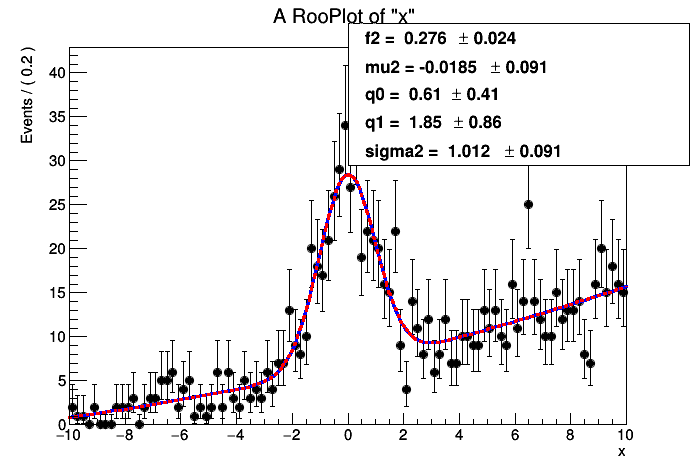

In [3]:
c.Draw()

In [4]:
model1.getParameters(data).Print("v")

  1) 0x7fe472ef0950 RooRealVar::     f1 = 0.275489 +/- 0.024184  L(0 - 1)  "signal fraction"
  2) 0x7fe472767050 RooRealVar::    mu1 = -0.0185904 +/- 0.0911539  L(-10 - 10)  "mu"
  3) 0x7fe47277ef90 RooRealVar::     p0 = 0.990939 +/- 0.0454175  L(0 - 100)  "p_0"
  4) 0x7fe472776f50 RooRealVar::     p1 = 0.104179 +/- 0.0585677  L(0 - 100)  "p_1"
  5) 0x7fe4727609c0 RooRealVar:: sigma1 = 1.01151 +/- 0.0912443  L(0 - 100)  "sigma"


In [5]:
model2.getParameters(data).Print("v")

  1) 0x7fe472ffeda0 RooRealVar::     f2 = 0.275517 +/- 0.0241741  L(0 - 1)  "signal fraction"
  2) 0x7fe4728ea870 RooRealVar::    mu2 = -0.0184998 +/- 0.0911579  L(-10 - 10)  "mu"
  3) 0x7fe472edf730 RooRealVar::    one = 0.1 C  L(-INF - +INF)  "one"
  4) 0x7fe472edfa90 RooRealVar::     q0 = 0.606526 +/- 0.407952  L(0 - 100)  "q_0"
  5) 0x7fe472ee0840 RooRealVar::     q1 = 1.84966 +/- 0.856998  L(0 - 100)  "q_1"
  6) 0x7fe4728eabd0 RooRealVar:: sigma2 = 1.01165 +/- 0.0912408  L(0 - 100)  "sigma"
